# Graph Neural Network to solve Ax=b

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.transforms import AddSelfLoops
from torch_geometric.data import Data, DataLoader

from scipy.sparse import coo_matrix, csr_matrix
from torch_sparse import coalesce, SparseTensor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

C:\Users\soha9\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Load data

A:   m x n  

b:   n x 1

x:   m x 1

In [3]:
# Load the data
# A_matrix_path = "data/A_ex9.txt"
# A_info = np.loadtxt(A_matrix_path)
# m, n = A_info.shape

# # Extract the row, column, and value arrays from the data
# row_A = A_info[:, 0].astype(int)
# col_A = A_info[:, 1].astype(int)
# val_A = A_info[:, 2]

# # Create the sparse matrix using COO format
# A_mfem = coo_matrix((val_A, (row_A, col_A)))

# print(A_mfem.shape)

## Convert A from sparse to dense matrix

In [4]:
# Convert the sparse matrix into a dense matrix and replace non-zero elements with 1
# dense_A_numpy = np.array(A_mfem.todense())
# adj_matrix_numpy = np.where(dense_A_numpy > 0, 1, 0)
# print(adj_matrix_numpy.shape)

## Convert numpy arrays to tensors

In [5]:
# A = torch.tensor(dense_A_numpy, dtype=torch.float)
# adj_matrix = torch.tensor(adj_matrix_numpy, dtype=torch.float)
# num_nodes = A.shape[0]

# b = torch.rand([num_nodes,1],dtype=torch.float)

# print('Number of nodes: ', num_nodes)
# print('A shape: ', A.shape)
# print('b shape: ', b.shape)
# print('Adjacency matrix shape: ', adj_matrix.shape)

In [6]:
num_nodes = 50
A = torch.rand((num_nodes, num_nodes))
b = torch.rand((num_nodes, 1))
x = b.clone()

# edge_index = torch.nonzero(A)
# edge_attr = A[edge_index[:,0], edge_index[:,1]]

#data = Data(x=x, edge_index=edge_index.t().contiguous(), edge_attr=edge_attr, num_nodes=A.shape[0])

## Edge Index

In graph neural networks, edge_index is a commonly used term that refers to a matrix or tensor that represents the edges of a graph. It is a two-dimensional matrix with two rows, where each column represents an edge of the graph. The first row of the matrix contains the index of the source nodes of each edge, while the second row contains the index of the destination nodes.

For example, let's say we have a simple undirected graph with 4 nodes and 3 edges, where the edges are (0,1), (1,2), and (2,3). We can represent this graph using the following edge_index matrix:

```
edge_index = [
  [0, 1, 1, 2],
  [1, 0, 2, 3]
]
```
Here, the first row of edge_index represents the source nodes of each edge, and the second row represents the destination nodes. For example, the first edge (0,1) has source node 0 and destination node 1.

The edge_index matrix is typically used in conjunction with node feature matrices to define the input to a graph neural network. The node feature matrix contains features for each node in the graph, while the edge_index matrix describes the edges that connect the nodes. By combining these two matrices, a graph neural network can learn to operate on the graph structure and its associated features.

## Edge Weights

In graph neural networks, edge_weights are values associated with the edges of a graph, which can be used to represent the strength, importance or similarity between connected nodes. edge_weights can be used in a variety of ways, such as during message passing, graph convolutions or pooling operations.

edge_weights can be represented as a tensor or an array, with one value per edge. If the edges are unweighted, i.e., all edges are equally important, then the edge_weights can be represented as an array of ones. However, if the edges have different weights, then the edge_weights can be assigned accordingly.

In [7]:
# Create edge_index
mask = A != 0  # Get a boolean mask of non-zero elements in A
rows, cols = mask.nonzero(as_tuple=True)  # Get the row and column indices of non-zero elements
edge_index = torch.stack([rows, cols], dim=0)

# Create edge_weights
edge_weights = A[mask]

# Optionally add self-loops to the graph
#edge_index, edge_weights = torch.nn.utils.clip_grad.clip_grad_norm_(edge_index, edge_weights)

In [8]:
print('====== Edge Index =====')
print('edge_index shape: ',edge_index.shape)
print(edge_index)
print('====== Edge Weights =====')
print('edge_weights shape: ',edge_weights.shape)
print(edge_weights)

====== Edge Index =====
edge_index shape:  torch.Size([2, 2500])
tensor([[ 0,  0,  0,  ..., 49, 49, 49],
        [ 0,  1,  2,  ..., 47, 48, 49]])
====== Edge Weights =====
edge_weights shape:  torch.Size([2500])
tensor([0.1596, 0.8396, 0.9403,  ..., 0.3726, 0.4899, 0.2528])


## Actual Solution

In [9]:
A_inv = torch.inverse(A)
u = torch.mm(A_inv,b)
print(f'u shape: ',u.shape)
print(f'u is: \n',u)

u shape:  torch.Size([50, 1])
u is: 
 tensor([[ 3.4018],
        [-2.6560],
        [ 4.4705],
        [-2.4778],
        [-0.7071],
        [ 5.1924],
        [-8.6731],
        [ 5.2319],
        [-1.0517],
        [-1.9880],
        [ 0.9515],
        [-5.3937],
        [-2.7992],
        [ 4.9515],
        [-5.8410],
        [-5.5384],
        [-0.2194],
        [ 1.7919],
        [ 0.9320],
        [ 4.1807],
        [ 0.6433],
        [ 0.7741],
        [-2.2789],
        [-1.8997],
        [-2.5801],
        [ 0.4655],
        [ 3.0378],
        [ 3.5022],
        [-4.3247],
        [-2.6563],
        [ 1.9549],
        [ 2.0307],
        [ 3.0156],
        [ 1.5198],
        [-4.4025],
        [ 1.1938],
        [-6.1209],
        [ 4.2028],
        [ 1.1159],
        [-0.1479],
        [ 1.1293],
        [-3.1801],
        [ 0.0667],
        [-3.7434],
        [-7.9601],
        [ 3.8254],
        [ 5.1487],
        [ 2.1454],
        [ 4.4227],
        [ 4.4897]])


## Create data object for input to GNN

The Data object has the following attributes:

- **'x'**: a tensor of node features with shape **'[36865, 1]'**. This means there are 36865 nodes in the graph, each with 1 feature.
- **'edge_index'**: a tensor of shape **'[2, 662016]'** representing the edge index of the graph. The first row contains the source nodes and the second row contains the destination nodes. There are 662016 edges in the graph.

- **'edge_attr'**: a tensor of edge weights with shape **'[662016]'**. This means there is one weight for each edge in the graph.

- **'num_nodes'**: an integer value of **36865** representing the total number of nodes in the graph.

In [10]:
# Create a Data object from edge_index, edge_weights, and node features
data = Data(x=b, edge_index=edge_index, edge_attr=edge_weights, num_nodes=num_nodes, y=u)
data = data.to(device)

# Print the Data object
print(data)

Data(x=[50, 1], edge_index=[2, 2500], edge_attr=[2500], y=[50, 1], num_nodes=50)


## Graph Neural Network model

In [11]:
# Define the model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, 16)
        self.conv2 = GCNConv(16, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

## Train Graph Convolutional Network

In [14]:
model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define the loss function
criterion = torch.nn.MSELoss()

# Define the training loop
def train(model, data, optimizer, criterion, device):
    model.train()

    # Move the data to the device
    data = data.to(device)

    # Zero the gradients
    optimizer.zero_grad()

    # Compute the model output
    out = model(data.x, data.edge_index)

    # Compute the loss
    loss = criterion(out, data.y)

    # Backpropagate the gradients
    loss.backward()
    optimizer.step()

    return loss.item()

# Train the model
loss_list = []
for epoch in range(500):
    loss = train(model, data, optimizer, criterion, device)
    loss_list.append(loss)
    print('Epoch {}, Loss: {}'.format(epoch, loss))

Epoch 0, Loss: 13.351969718933105
Epoch 1, Loss: 13.31161117553711
Epoch 2, Loss: 13.284564018249512
Epoch 3, Loss: 13.270124435424805
Epoch 4, Loss: 13.26648998260498
Epoch 5, Loss: 13.270333290100098
Epoch 6, Loss: 13.276820182800293
Epoch 7, Loss: 13.281439781188965
Epoch 8, Loss: 13.28293228149414
Epoch 9, Loss: 13.281805992126465
Epoch 10, Loss: 13.278913497924805
Epoch 11, Loss: 13.275259971618652
Epoch 12, Loss: 13.27171802520752
Epoch 13, Loss: 13.268901824951172
Epoch 14, Loss: 13.267134666442871
Epoch 15, Loss: 13.266464233398438
Epoch 16, Loss: 13.266715049743652
Epoch 17, Loss: 13.26756763458252
Epoch 18, Loss: 13.268648147583008
Epoch 19, Loss: 13.269623756408691
Epoch 20, Loss: 13.270248413085938
Epoch 21, Loss: 13.270414352416992
Epoch 22, Loss: 13.270130157470703
Epoch 23, Loss: 13.269497871398926
Epoch 24, Loss: 13.268680572509766
Epoch 25, Loss: 13.267844200134277
Epoch 26, Loss: 13.26714038848877
Epoch 27, Loss: 13.266667366027832
Epoch 28, Loss: 13.266460418701172
E

Epoch 238, Loss: 13.266449928283691
Epoch 239, Loss: 13.266449928283691
Epoch 240, Loss: 13.266449928283691
Epoch 241, Loss: 13.266449928283691
Epoch 242, Loss: 13.266448974609375
Epoch 243, Loss: 13.266448974609375
Epoch 244, Loss: 13.266449928283691
Epoch 245, Loss: 13.266449928283691
Epoch 246, Loss: 13.266448974609375
Epoch 247, Loss: 13.266448974609375
Epoch 248, Loss: 13.266448974609375
Epoch 249, Loss: 13.266449928283691
Epoch 250, Loss: 13.266449928283691
Epoch 251, Loss: 13.266449928283691
Epoch 252, Loss: 13.266449928283691
Epoch 253, Loss: 13.266449928283691
Epoch 254, Loss: 13.266449928283691
Epoch 255, Loss: 13.266449928283691
Epoch 256, Loss: 13.266449928283691
Epoch 257, Loss: 13.266448974609375
Epoch 258, Loss: 13.266448974609375
Epoch 259, Loss: 13.266448974609375
Epoch 260, Loss: 13.266448974609375
Epoch 261, Loss: 13.266448974609375
Epoch 262, Loss: 13.266448974609375
Epoch 263, Loss: 13.266449928283691
Epoch 264, Loss: 13.266449928283691
Epoch 265, Loss: 13.26644992

Epoch 472, Loss: 13.266449928283691
Epoch 473, Loss: 13.266449928283691
Epoch 474, Loss: 13.266449928283691
Epoch 475, Loss: 13.266449928283691
Epoch 476, Loss: 13.266449928283691
Epoch 477, Loss: 13.266449928283691
Epoch 478, Loss: 13.266449928283691
Epoch 479, Loss: 13.266449928283691
Epoch 480, Loss: 13.266449928283691
Epoch 481, Loss: 13.266449928283691
Epoch 482, Loss: 13.266449928283691
Epoch 483, Loss: 13.266449928283691
Epoch 484, Loss: 13.266449928283691
Epoch 485, Loss: 13.266449928283691
Epoch 486, Loss: 13.266449928283691
Epoch 487, Loss: 13.266449928283691
Epoch 488, Loss: 13.266449928283691
Epoch 489, Loss: 13.266449928283691
Epoch 490, Loss: 13.266449928283691
Epoch 491, Loss: 13.266449928283691
Epoch 492, Loss: 13.266449928283691
Epoch 493, Loss: 13.266449928283691
Epoch 494, Loss: 13.266449928283691
Epoch 495, Loss: 13.266449928283691
Epoch 496, Loss: 13.266449928283691
Epoch 497, Loss: 13.266449928283691
Epoch 498, Loss: 13.266449928283691
Epoch 499, Loss: 13.26644992

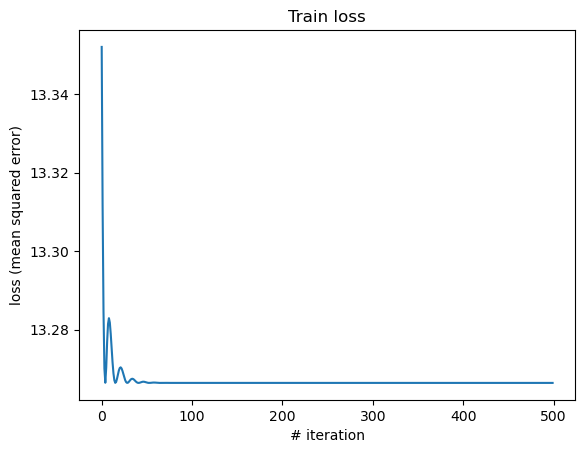

In [26]:
plt.figure(1)
plt.plot(loss_list, label = 'train loss')
plt.xlabel('# iteration')
plt.ylabel('loss (mean squared error)')
#plt.yscale('log')
plt.title('Train loss')
plt.show()

In [23]:
A = A.to(device)
b = b.to(device)
u = u.to(device)
# Compute predicted u and residual error
model.eval()
predicted_u = model(data.x, data.edge_index)
residual_error = torch.sqrt(torch.sum(torch.square(torch.mm(A, predicted_u) - b)))

In [24]:
residual_error

tensor(7.0140, device='cuda:0', grad_fn=<SqrtBackward0>)